In [2]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
# import imageio

In [3]:
heatmap_df = pd.read_csv('heatmap_workers.csv')

In [4]:
heatmap_df['SubmitTime'] = pd.to_datetime(heatmap_df['SubmitTime'])
heatmap_df[['WorkerId', 'SubmitTime']].sort_values('SubmitTime')

/usr/local/miniconda3/envs/cis530_conda/lib/python3.7/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,WorkerId,SubmitTime
33,A2QUXO9OJY69QM,2019-05-06 11:08:13
77,A3BLJ6QSDTZC9U,2019-05-06 11:08:18
61,A1MXW5CZIN62BU,2019-05-06 11:08:27
4,A3NZAEOHAO5LT6,2019-05-06 11:08:32
51,A2KLT3Z3UUJCQV,2019-05-06 11:08:52
8,A3IX2J5AVF3LRG,2019-05-06 11:09:07
72,AIN7LSGBTD8HF,2019-05-06 11:09:38
42,A2UIRQTM2V9F7V,2019-05-06 11:09:45
56,A35X2QXIS7N1W1,2019-05-06 11:09:47
32,A23954R5J40QR0,2019-05-06 11:10:07


In [5]:
heatmap_df['WorkTimeInSeconds'].describe()

count     100.000000
mean      104.410000
std       391.329232
min         9.000000
25%        23.000000
50%        28.500000
75%        44.750000
max      2733.000000
Name: WorkTimeInSeconds, dtype: float64

In [6]:
worker_submittime = {}
for _, row in heatmap_df[['WorkerId', 'SubmitTime']].iterrows():
    worker_submittime[row['WorkerId']] = row['SubmitTime']
worker_submittime

{'A1LUZ1LUPUWUIL': Timestamp('2019-05-06 11:34:16'),
 'A1F73T5YAJ9J9': Timestamp('2019-05-06 13:56:46'),
 'AHBJPKHFURJ3I': Timestamp('2019-05-06 13:41:58'),
 'APZQEJ9KPIZOC': Timestamp('2019-05-06 11:12:38'),
 'A3NZAEOHAO5LT6': Timestamp('2019-05-06 11:08:32'),
 'AWU522IJMK5EB': Timestamp('2019-05-06 11:31:14'),
 'A3PR49TI746YMM': Timestamp('2019-05-06 17:36:16'),
 'ANQF0LHVK1236': Timestamp('2019-05-06 11:13:14'),
 'A3IX2J5AVF3LRG': Timestamp('2019-05-06 11:09:07'),
 'A349TSPKFHIWE1': Timestamp('2019-05-06 11:21:51'),
 'A1EVKV4NXCYN5Z': Timestamp('2019-05-06 13:18:07'),
 'A3O1LQCBNGXL7P': Timestamp('2019-05-06 12:14:46'),
 'A2UX1I209LML50': Timestamp('2019-05-06 11:13:45'),
 'A26HH5XUH214F7': Timestamp('2019-05-06 12:00:08'),
 'A2Z1GI3BKVQOKR': Timestamp('2019-05-06 11:19:02'),
 'A3SHFOPG16PGNX': Timestamp('2019-05-06 14:14:50'),
 'A2IPLNZ9SMN8MK': Timestamp('2019-05-06 12:25:19'),
 'A2HR7ZIX42FEPG': Timestamp('2019-05-06 11:53:04'),
 'A2TEF5K1UBKZ2C': Timestamp('2019-05-06 12:32:28')

In [23]:
points = []
points_per_worker = defaultdict(int)
for worker_id, response in zip(heatmap_df['WorkerId'], heatmap_df['Answer.response']):
    response = json.loads(response)
    for click in response:
        points.append((round(click['x']), round(click['y']), click['timestamp'], worker_id))
    points_per_worker[worker_id] += len(response)
        
points.sort(key=lambda x: x[2])

In [8]:
# len(heatmap_df['WorkerId'].value_counts())

In [24]:
sorted(points_per_worker.items(), key=lambda x: worker_submittime[x[0]])

[('A2QUXO9OJY69QM', 20),
 ('A3BLJ6QSDTZC9U', 12),
 ('A1MXW5CZIN62BU', 17),
 ('A3NZAEOHAO5LT6', 10),
 ('A2KLT3Z3UUJCQV', 10),
 ('A3IX2J5AVF3LRG', 10),
 ('AIN7LSGBTD8HF', 10),
 ('A2UIRQTM2V9F7V', 11),
 ('A35X2QXIS7N1W1', 10),
 ('A23954R5J40QR0', 10),
 ('A3NWQ0535HAXUD', 10),
 ('A2WINYCSL7HZEC', 22),
 ('A3AD3D4PZX4QCB', 28),
 ('A1EGQAMPW9N5FT', 10),
 ('A8PJHNOLEDTZI', 32),
 ('A1TLKBW8KT7L6F', 10),
 ('A35N8ILHISO4RW', 10),
 ('A1QX1YDOAN4LNA', 10),
 ('A29KTWZQDUOLR9', 23),
 ('APZQEJ9KPIZOC', 10),
 ('ANQF0LHVK1236', 15),
 ('A2NGVPAXDPI41B', 10),
 ('A2UX1I209LML50', 10),
 ('A1BZNPQ0H7ZSER', 10),
 ('A3TMU2RBQ3Y7F6', 11),
 ('A2ADZEAP130MI2', 17),
 ('AFMH601P0QVUK', 15),
 ('AIYRSCNQ8I2QN', 27),
 ('A2Z1GI3BKVQOKR', 10),
 ('AOW5IZPNM79WW', 20),
 ('A349TSPKFHIWE1', 12),
 ('A32YRYS1OSFVO3', 10),
 ('A1NVQWRO6FJDBI', 10),
 ('AH7I3K3OJKA5L', 10),
 ('A1OD9OA9B34FL', 13),
 ('AMAHA0ZFX82VZ', 22),
 ('AWU522IJMK5EB', 10),
 ('A2TFCGGXOTX5YC', 16),
 ('A1LUZ1LUPUWUIL', 17),
 ('A3MW1FSUZ4MMGE', 10),
 ('A2VJAAYE

In [10]:
pd.Series(list(points_per_worker.values())).describe()

count    100.000000
mean      12.580000
std        5.081517
min       10.000000
25%       10.000000
50%       10.000000
75%       12.000000
max       34.000000
dtype: float64

In [11]:
heatmap_df['WorkerId'].value_counts()

A1SUUTWO9RWT4F    1
A2346ZKALGO10B    1
A349TSPKFHIWE1    1
AXRLKDISA8LR3     1
A1QX1YDOAN4LNA    1
A1BZNPQ0H7ZSER    1
A2WINYCSL7HZEC    1
AH7I3K3OJKA5L     1
A1286MJRXBW4QP    1
AFMH601P0QVUK     1
A1NAWLZ2HOJZPB    1
A1MXW5CZIN62BU    1
A3C0Z2U1VXFOJN    1
A3NWQ0535HAXUD    1
A1LXZ36RV89PSH    1
A8PJHNOLEDTZI     1
A2637HO77XFWQI    1
A337MKRWW1YJSD    1
A2NGVPAXDPI41B    1
ABVM2KJ7CRNZ0     1
A1CB1KFUN5OQVY    1
A1KVE1E8ZON2F7    1
A3TMU2RBQ3Y7F6    1
A2HR7ZIX42FEPG    1
ABN9IUIM1YA7Y     1
A1ANSFI5L7SUUH    1
A10S5LDYYYB496    1
A3RAL81XKTKNMS    1
A3BLJ6QSDTZC9U    1
A153IWW5M88F18    1
                 ..
A1G5UODTVW13MM    1
A3NZAEOHAO5LT6    1
AZVHLSUNF4YRH     1
AJ86CAZX0QCE9     1
A1F73T5YAJ9J9     1
AIN7LSGBTD8HF     1
ADKDC0IXTYCIJ     1
A1FG2G9TZSDN      1
A3SLXZURCF9O67    1
APZQEJ9KPIZOC     1
A3PIHDC8LXVQ4H    1
A2UIRQTM2V9F7V    1
ACID7NKW5A8QC     1
A1BNEJ2Q76JNF3    1
A35X2QXIS7N1W1    1
A3PSIT0A7OU2FL    1
A3SHFOPG16PGNX    1
A3PR49TI746YMM    1
A29KTWZQDUOLR9    1


In [25]:
xs, ys, _, _ = zip(*points)
print(pd.Series(list(xs)).describe())
print(pd.Series(list(ys)).describe())

count    1258.000000
mean      288.201908
std        85.764180
min        94.000000
25%       222.000000
50%       284.000000
75%       354.000000
max       577.000000
dtype: float64
count    1258.000000
mean      220.500000
std        48.692143
min        63.000000
25%       199.000000
50%       223.000000
75%       247.000000
max       406.000000
dtype: float64


In [16]:
# img_data = np.ones((600, 477))
# for x, y in points:
#     img_data[x, y] = 0

In [17]:
# xs, ys = zip(*points)
# print(min(xs), max(xs), min(ys), max(ys))

In [18]:
import seaborn as sns

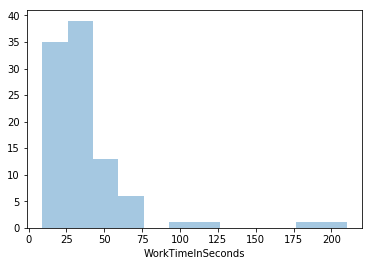

In [28]:
work_time_in_seconds = heatmap_df[heatmap_df['WorkTimeInSeconds'] < 1500]['WorkTimeInSeconds']

sns.distplot(work_time_in_seconds, bins=12, hist=True, kde=False)

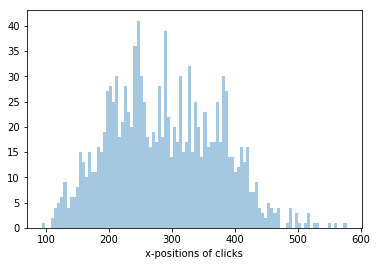

In [29]:
sns.distplot(xs, bins=100, hist=True, kde=False, axlabel='x-positions of clicks')

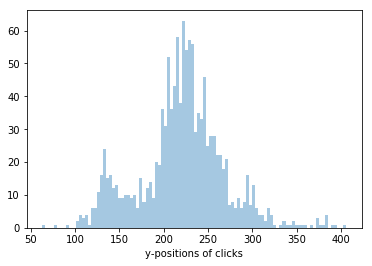

In [30]:
sns.distplot(ys, bins=100, hist=True, kde=False, axlabel='y-positions of clicks')

In [27]:
heatmap_df['WorkTimeInSeconds']

0      23
1      33
2      30
3     183
4      49
5      28
6      28
7      26
8      28
9      16
10     30
11     38
12     28
13     51
14     14
15     47
16     25
17     25
18     19
19     12
20     12
21     22
22     31
23     47
24     37
25     18
26     26
27     18
28     49
29     29
     ... 
70     27
71     26
72     65
73     23
74     24
75     94
76     30
77     26
78     35
79     44
80      9
81     52
82     37
83     22
84     32
85     24
86     32
87     28
88     73
89     27
90     25
91     11
92     19
93     33
94    126
95     63
96     27
97     14
98     52
99     39
Name: WorkTimeInSeconds, Length: 100, dtype: int64